## Striplog app

This app aims to facilitate quick visualisation of drillhole data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines


In [2]:
# Load collar data to get max depths for each hole
collar_data = pd.read_csv('./data/collar.csv')

In [3]:
# Print the headers of the merged table
merged_data=pd.read_csv('./data/merged_data.csv')

In [4]:
print(merged_data.columns.tolist())

['holeid', 'from', 'to', 'Alteracion', 'PP_MINTYPE_calculadoPtXt', 'AG', 'AS', 'Au_ppb_BEST', 'ClT_kgt_BEST', 'CO3_pct_BEST', 'CUCN', 'CUFE', 'CUS', 'CUT', 'FE', 'FET', 'MO', 'PP_AS_PP', 'PP_CC_2CSR', 'PP_CC_PP', 'PP_COV_2CSR', 'PP_COV_PP', 'PP_CPY_2CSR', 'PP_CPY_PP', 'PY_BEST', 'S', 'S2', 'FFEspaciamiento', 'FFNumFracAb30Grad', 'FFNumFracAb60Grad', 'FFNumFracAb90Grad', 'FFrecFrac', 'FFTotalFracAbSell', 'Litologia', 'RqdRQD']


In [5]:
print(merged_data.head())

    holeid  from    to Alteracion PP_MINTYPE_calculadoPtXt    AG    AS  \
0  DMH0003   0.0   8.0        NaN                      NaN   NaN   NaN   
1  DMH0003   8.0  10.0        NaN                      -99 -99.0 -99.0   
2  DMH0003  10.0  28.0        NaN                      NaN   NaN   NaN   
3  DMH0003  28.0  30.0        NaN                      -99 -99.0 -99.0   
4  DMH0003  30.0  48.0        NaN                      NaN   NaN   NaN   

   Au_ppb_BEST  ClT_kgt_BEST  CO3_pct_BEST  ...     S    S2  FFEspaciamiento  \
0          NaN           NaN           NaN  ...   NaN   NaN              NaN   
1        -99.0           NaN           NaN  ... -99.0 -99.0              NaN   
2          NaN           NaN           NaN  ...   NaN   NaN              NaN   
3        -99.0           NaN           NaN  ... -99.0 -99.0              NaN   
4          NaN           NaN           NaN  ...   NaN   NaN              NaN   

   FFNumFracAb30Grad  FFNumFracAb60Grad  FFNumFracAb90Grad  FFrecFrac  \
0

In [6]:
merged_data = merged_data.replace(-99, np.NaN)
merged_data = merged_data.replace('-99', np.NaN)

In [7]:
print(merged_data.head())

    holeid  from    to Alteracion PP_MINTYPE_calculadoPtXt  AG  AS  \
0  DMH0003   0.0   8.0        NaN                      NaN NaN NaN   
1  DMH0003   8.0  10.0        NaN                      NaN NaN NaN   
2  DMH0003  10.0  28.0        NaN                      NaN NaN NaN   
3  DMH0003  28.0  30.0        NaN                      NaN NaN NaN   
4  DMH0003  30.0  48.0        NaN                      NaN NaN NaN   

   Au_ppb_BEST  ClT_kgt_BEST  CO3_pct_BEST  ...   S  S2  FFEspaciamiento  \
0          NaN           NaN           NaN  ... NaN NaN              NaN   
1          NaN           NaN           NaN  ... NaN NaN              NaN   
2          NaN           NaN           NaN  ... NaN NaN              NaN   
3          NaN           NaN           NaN  ... NaN NaN              NaN   
4          NaN           NaN           NaN  ... NaN NaN              NaN   

   FFNumFracAb30Grad  FFNumFracAb60Grad  FFNumFracAb90Grad  FFrecFrac  \
0                NaN                NaN          

In [8]:
#Assign values
lithology=merged_data['Litologia']
alteration=merged_data['Alteracion']

#List the parameters to plot
parameters=['FFEspaciamiento','RqdRQD','CUS','MO','CUFE']


In [9]:
cmap_parameters = {
    'FFEspaciamiento': 'deepskyblue', 
    'RqdRQD': 'darkorange',  
    'CUS': 'indianred',
    'MO':'mediumpurple',
    'CUFE':'firebrick'
}


In [10]:
# Enumarate the lithologies
unique_lithologies = lithology.unique()
# Print the unique lithologies
print("Unique lithologies in the dataset:")
for lithology in unique_lithologies:
    print(lithology)


Unique lithologies in the dataset:
GRAV
AR
IND
SED
SBR
QFP1
COV
nan
QFP2
BRXH
FP
ABX1
ABX2
ABX3
VOLC


In [11]:
#Creation of the color map based on the different lithologies
cmap_lith = {
    'GRAV':'tan',
    'AR':'darkgoldenrod',
    'IND':'silver',
    'SED':'gold',
    'SBR':'chocolate',
    'QFP1':'hotpink',
    'COV':'cornsilk',
    'QFP2':'coral',
    'BRXH':'antiquewhite',
    'FP':'mediumslateblue',
    'ABX1':'mediumorchid',
    'ABX2':'lightcoral',
    'ABX3':'rosybrown',
    'VOLC':'darkseagreen'
}


In [12]:
# Enumarate the alteration
unique_alteration = alteration.unique()
# Print the unique lithologies
print("Unique alteration in the dataset:")
for alteration in unique_alteration:
    print(alteration)


Unique alteration in the dataset:
nan
A
CL
QS
SA
P
KB
KF


In [13]:
#Creation of the color map based on the different alteration
cmap_alt = {
    'A': 'peru',       # Arbitrary color
    'CL': 'yellowgreen',     # Arbitrary color
    'QS': 'lightsalmon',       # Arbitrary color
    'SA': 'orchid',    # Arbitrary color
    'P': 'coral',     # Arbitrary color
    'KB': 'gold',    # Arbitrary color
    'KF': 'pink'       # Arbitrary color
}


In [14]:
holeid = 'SPD0412'  # Use the same hole ID for lithology, alteration and parameters

In [15]:
filtered_litho_alt=merged_data[merged_data['holeid']==holeid].copy()
filtered_parameters = merged_data[merged_data['holeid'] == holeid].copy()


In [16]:
filtered_parameters['MidDepth'] = (filtered_parameters['from'] + filtered_parameters['to']) / 2

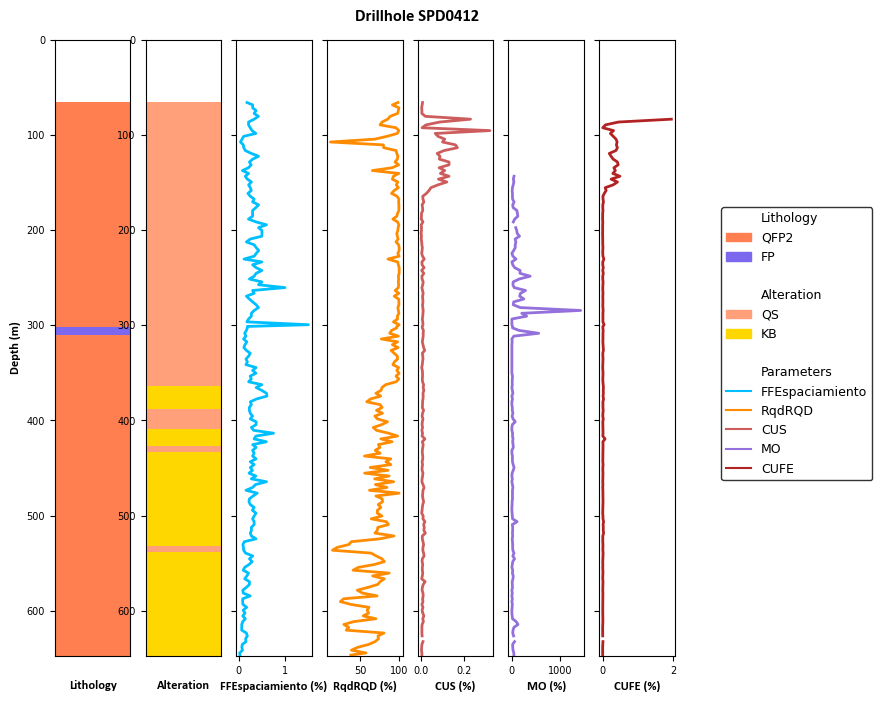

In [17]:
# Setup figure and axes using GridSpec
fig = plt.figure(figsize=(8, 8))  # Adjust the size as needed
gs = GridSpec(1, len(parameters) + 2, figure=fig)
fig.set(facecolor='none')
# General title for the figure
fig.suptitle(f'Drillhole {holeid}', y= 0.9, fontsize=12, fontweight='bold', fontname='Calibri', ha='left', va='bottom')
# Plot striplog Lithology
ax_lith = fig.add_subplot(gs[0, 0])
ax_lith.set(facecolor = "white")
for index, lith in filtered_litho_alt.iterrows():
    color = cmap_lith.get(lith['Litologia'], 'white')
    rect = patches.Rectangle((0, lith['from']), 1, lith['to'] - lith['from'], linewidth=1, edgecolor='None', facecolor=color)
    ax_lith.add_patch(rect)
    
ax_lith.set_ylim([max(filtered_litho_alt['to']), min(filtered_litho_alt['from'])])
ax_lith.set_xlim([0, 1])
ax_lith.set_xticks([])
ax_lith.set_ylabel('Depth (m)', fontsize=9, fontweight='bold', fontname='Calibri')
ax_lith.set_xlabel('Lithology', fontsize=9, fontweight='bold', fontname='Calibri', labelpad=17)
ax_lith.tick_params(axis='y', labelsize=7)  # Set tick label font size for y-axis

# Plot striplog alteration
ax_alt = fig.add_subplot(gs[0,1])
ax_alt.set(facecolor="white")
for id, alt in filtered_litho_alt.iterrows():
    color = cmap_alt.get(alt['Alteracion'], 'white')
    rect = patches.Rectangle((0, alt['from']), 1, alt['to'] - alt['from'], linewidth=1, edgecolor='None', facecolor=color)
    ax_alt.add_patch(rect)

ax_alt.set_ylim([max(filtered_litho_alt['to']), min(filtered_litho_alt['from'])])
ax_alt.set_xlim([0, 1])
ax_alt.set_xticks([])
ax_alt.set_xlabel('Alteration', fontsize=9, fontweight='bold', fontname='Calibri', labelpad=17)
ax_alt.tick_params(axis='y', labelsize=7)  # Set tick label font size for y-axis

#Set null value
null_value='NaN'

# Plot parameters
for idx, element in enumerate(parameters, start=2):
    ax = fig.add_subplot(gs[0, idx])
    ax.set(facecolor = "white")
    data_to_plot = filtered_parameters[element].replace(null_value, 0)
    ax.plot(data_to_plot, filtered_parameters['MidDepth'], color=cmap_parameters[element], linewidth=2)
    ax.set_xlabel(f"{element} (%)", fontsize=9, fontweight='bold', fontname='Calibri')
    ax.set_ylim([max(filtered_litho_alt['to']), min(filtered_litho_alt['from'])])  # Reverse the y-axis
    ax.tick_params(axis='both', labelsize=7)  # Set tick label font size for both axes
    ax.grid(False)  # Turn off the grid
    if idx > 1:
        ax.set_yticklabels([])  # Hide y-axis labels for all but the first paramaters plot

# Collect unique lithology and alteration from the data
unique_lithologies = filtered_litho_alt['Litologia'].unique()
unique_alterations = filtered_litho_alt['Alteracion'].unique()  # Assuming 'Alteracion' column exists

# Handles for the legend
legend_handles = []

# Add Lithology entries to legend
legend_handles.append(patches.Patch(color='none', label='Lithology'))  # Subtitle for lithology
for label, color in cmap_lith.items():
    if label in unique_lithologies:
        legend_handles.append(patches.Patch(color=color, label=label))
legend_handles.append(patches.Patch(color='none', label=''))  # For separation

# Add Alteration entries to legend
legend_handles.append(patches.Patch(color='none', label='Alteration'))  # Subtitle for alteration
for label, color in cmap_alt.items():
    if label in unique_alterations:
        legend_handles.append(patches.Patch(color=color, label=label))
legend_handles.append(patches.Patch(color='none', label=''))  # For separation

# Add Parameters entries to legend
legend_handles.append(patches.Patch(color='none', label='Parameters'))  # Subtitle for parameters
for label, color in cmap_parameters.items():
    legend_handles.append(mlines.Line2D([], [], color=color, label=label))
    
# Setting the legend outside the plot area on the right
fig.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(0.95, 0.5),
           fontsize=9, edgecolor='black')

plt.show()
plt.savefig('figure.png', dpi=300, bbox_inches='tight', pad_inches=0.1)